In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
# For this cleaning all error columns were removed. 
selected_features = df
selected_features

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
# Assign the data and the target and pass them as arrays
X = selected_features.drop(columns = ['koi_tce_plnt_num','koi_disposition'])
y = selected_features[['koi_disposition']]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

y_train

,koi_disposition
2957,CANDIDATE
6099,CANDIDATE
1032,CANDIDATE
4640,CANDIDATE
1521,CANDIDATE
...,...
6443,CANDIDATE
3606,FALSE POSITIVE
5704,FALSE POSITIVE
6637,FALSE POSITIVE


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale the X data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# type(X_test_scaled)

# Train the Model and Test with Test Data



In [8]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# print(f"Training Data Score: {fitted.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {fitted.score(X_test_scaled, y_test)}")

C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 1.000/0.806


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.902/0.814


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.874/0.820


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.862/0.818


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.859/0.818


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.853/0.820


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.852/0.826


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.847/0.823


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.843/0.823


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.845/0.823


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 21, Train/Test Score: 0.841/0.822


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 23, Train/Test Score: 0.837/0.818


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 25, Train/Test Score: 0.837/0.815


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 27, Train/Test Score: 0.835/0.821


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 29, Train/Test Score: 0.831/0.822


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 31, Train/Test Score: 0.831/0.818


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 33, Train/Test Score: 0.832/0.819


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 35, Train/Test Score: 0.831/0.815


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 37, Train/Test Score: 0.833/0.816


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 39, Train/Test Score: 0.831/0.816


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 41, Train/Test Score: 0.831/0.815


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 43, Train/Test Score: 0.828/0.818


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 45, Train/Test Score: 0.829/0.815


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 47, Train/Test Score: 0.829/0.814


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 49, Train/Test Score: 0.827/0.814


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 51, Train/Test Score: 0.828/0.812


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 53, Train/Test Score: 0.827/0.813


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 55, Train/Test Score: 0.828/0.813


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 57, Train/Test Score: 0.828/0.813


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 59, Train/Test Score: 0.828/0.813


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 61, Train/Test Score: 0.827/0.809


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 63, Train/Test Score: 0.825/0.811


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 65, Train/Test Score: 0.824/0.810


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 67, Train/Test Score: 0.826/0.811


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 69, Train/Test Score: 0.825/0.810


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 71, Train/Test Score: 0.825/0.811


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 73, Train/Test Score: 0.826/0.809


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 75, Train/Test Score: 0.825/0.808


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 77, Train/Test Score: 0.826/0.807


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 79, Train/Test Score: 0.825/0.807


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 81, Train/Test Score: 0.824/0.805


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 83, Train/Test Score: 0.825/0.803


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 85, Train/Test Score: 0.824/0.807


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 87, Train/Test Score: 0.823/0.804


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 89, Train/Test Score: 0.822/0.803


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 91, Train/Test Score: 0.820/0.802


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 93, Train/Test Score: 0.820/0.803


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 95, Train/Test Score: 0.820/0.800


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 97, Train/Test Score: 0.819/0.802


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 99, Train/Test Score: 0.819/0.802


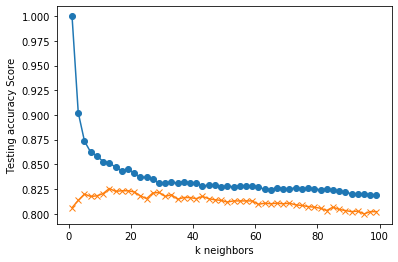

In [10]:
# Plot of testing and train accuracy scores
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [68]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV


# algorithm - nearest neighbor algorithm
algorithm = ['ball_tree', 'kd_tree', 'brute']

#Leaf size passed to BallTree or KDTree
leaf_size = [10, 30, 60, 90, 120]

# Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances
p = [1, 2]

# Create the parameter grid
param_grid =dict(leaf_size = leaf_size, p = p, algorithm = algorithm)

print(param_grid)

{'leaf_size': [10, 30, 60, 90, 120], 'p': [1, 2], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}


In [69]:
# Train the model with GridSearch
knn = KNeighborsClassifier()
fitted_gridded_KNN = GridSearchCV(knn, param_grid, verbose=3)

In [70]:
# Train the gridded model
fitted_gridded_KNN.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] algorithm=ball_tree, leaf_size=10, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=10, p=1, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y w

[CV]  algorithm=ball_tree, leaf_size=10, p=1, score=0.821, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=10, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, p=1, score=0.828, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=10, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, p=2, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=10, p=2, score=0.803, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, p=2, score=0.833, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=10, p=2, score=0.809, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, p=2, score=0.817, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=30, p=1, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, p=1, score=0.821, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=30, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, p=1, score=0.828, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=30, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, p=2, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=30, p=2, score=0.803, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, p=2, score=0.833, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=30, p=2, score=0.809, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, p=2, score=0.817, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=60, p=1, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=60, p=1, score=0.821, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=60, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=60, p=1, score=0.828, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=60, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=60, p=2, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=60, p=2, score=0.803, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=60, p=2, score=0.833, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=60, p=2, score=0.809, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=60, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=60, p=2, score=0.817, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=90, p=1, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=90, p=1, score=0.821, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=90, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=1 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=90, p=1, score=0.828, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=90, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=90, p=2, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=90, p=2, score=0.803, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=90, p=2, score=0.833, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=90, p=2, score=0.809, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=90, p=2 ..........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=90, p=2, score=0.817, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=1 .........................
[CV]  algorithm=ball_tree, leaf_size=120, p=1, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=1 .........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=120, p=1, score=0.821, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=1 .........................
[CV]  algorithm=ball_tree, leaf_size=120, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=1 .........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=120, p=1, score=0.828, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=1 .........................
[CV]  algorithm=ball_tree, leaf_size=120, p=1, score=0.841, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=2 .........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=120, p=2, score=0.827, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=2 .........................
[CV]  algorithm=ball_tree, leaf_size=120, p=2, score=0.803, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=2 .........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=120, p=2, score=0.833, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=2 .........................
[CV]  algorithm=ball_tree, leaf_size=120, p=2, score=0.809, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=120, p=2 .........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=120, p=2, score=0.817, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=10, p=1, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, p=1, score=0.821, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=10, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, p=1, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=10, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, p=2, score=0.827, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=10, p=2, score=0.803, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, p=2, score=0.833, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=10, p=2, score=0.809, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, p=2, score=0.817, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=30, p=1, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, p=1, score=0.821, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=30, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, p=1, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=30, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, p=2, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=30, p=2, score=0.803, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, p=2, score=0.833, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=30, p=2, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, p=2, score=0.817, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=60, p=1, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=60, p=1, score=0.821, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=60, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=60, p=1, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=60, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=60, p=2, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=60, p=2, score=0.803, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=60, p=2, score=0.833, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=60, p=2, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=60, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=60, p=2, score=0.817, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=90, p=1, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=90, p=1, score=0.821, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=90, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=1 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=90, p=1, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=1 ............................
[CV]  algorithm=kd_tree, leaf_size=90, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=90, p=2, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=90, p=2, score=0.803, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=90, p=2, score=0.833, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=2 ............................
[CV]  algorithm=kd_tree, leaf_size=90, p=2, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=90, p=2 ............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=90, p=2, score=0.817, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=1 ...........................
[CV]  algorithm=kd_tree, leaf_size=120, p=1, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=1 ...........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=120, p=1, score=0.821, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=1 ...........................
[CV]  algorithm=kd_tree, leaf_size=120, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=1 ...........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=120, p=1, score=0.828, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=1 ...........................
[CV]  algorithm=kd_tree, leaf_size=120, p=1, score=0.841, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=2 ...........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=120, p=2, score=0.827, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=2 ...........................
[CV]  algorithm=kd_tree, leaf_size=120, p=2, score=0.803, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=2 ...........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=120, p=2, score=0.833, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=2 ...........................
[CV]  algorithm=kd_tree, leaf_size=120, p=2, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=120, p=2 ...........................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=120, p=2, score=0.817, total=   0.1s
[CV] algorithm=brute, leaf_size=10, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=1, score=0.827, total=   0.2s
[CV] algorithm=brute, leaf_size=10, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=10, p=1, score=0.821, total=   0.2s
[CV] algorithm=brute, leaf_size=10, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=10, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=10, p=1, score=0.828, total=   0.2s
[CV] algorithm=brute, leaf_size=10, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=10, p=2 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=10, p=2, score=0.827, total=   0.1s
[CV] algorithm=brute, leaf_size=10, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=2, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=10, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=2, score=0.833, total=   0.1s

C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] algorithm=brute, leaf_size=10, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=2, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=10, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=10, p=2, score=0.817, total=   0.1s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.827, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.821, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.828, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=2, score=0.827, total=   0.1s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=30, p=2, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=2, score=0.833, total=   0.1s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=2, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=30, p=2, score=0.817, total=   0.1s
[CV] algorithm=brute, leaf_size=60, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=1, score=0.827, total=   0.2s
[CV] algorithm=brute, leaf_size=60, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=60, p=1, score=0.821, total=   0.2s
[CV] algorithm=brute, leaf_size=60, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=60, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=1, score=0.828, total=   0.2s
[CV] algorithm=brute, leaf_size=60, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=60, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=60, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=2, score=0.827, total=   0.1s
[CV] algorithm=brute, leaf_size=60, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=2, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=60, p=2 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_select

[CV] .. algorithm=brute, leaf_size=60, p=2, score=0.833, total=   0.1s
[CV] algorithm=brute, leaf_size=60, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=2, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=60, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=60, p=2, score=0.817, total=   0.1s
[CV] algorithm=brute, leaf_size=90, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=90, p=1, score=0.827, total=   0.2s
[CV] algorithm=brute, leaf_size=90, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=90, p=1, score=0.821, total=   0.2s
[CV] algorithm=brute, leaf_size=90, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=90, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=90, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=90, p=1, score=0.828, total=   0.2s
[CV] algorithm=brute, leaf_size=90, p=1 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] .. algorithm=brute, leaf_size=90, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=90, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=90, p=2, score=0.827, total=   0.1s
[CV] algorithm=brute, leaf_size=90, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=90, p=2, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=90, p=2 ..............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_select

[CV] .. algorithm=brute, leaf_size=90, p=2, score=0.833, total=   0.1s
[CV] algorithm=brute, leaf_size=90, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=90, p=2, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=90, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=90, p=2, score=0.817, total=   0.1s
[CV] algorithm=brute, leaf_size=120, p=1 .............................
[CV] . algorithm=brute, leaf_size=120, p=1, score=0.827, total=   0.2s
[CV] algorithm=brute, leaf_size=120, p=1 .............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] . algorithm=brute, leaf_size=120, p=1, score=0.821, total=   0.2s
[CV] algorithm=brute, leaf_size=120, p=1 .............................
[CV] . algorithm=brute, leaf_size=120, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=120, p=1 .............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] . algorithm=brute, leaf_size=120, p=1, score=0.828, total=   0.2s
[CV] algorithm=brute, leaf_size=120, p=1 .............................
[CV] . algorithm=brute, leaf_size=120, p=1, score=0.841, total=   0.2s
[CV] algorithm=brute, leaf_size=120, p=2 .............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] . algorithm=brute, leaf_size=120, p=2, score=0.827, total=   0.1s
[CV] algorithm=brute, leaf_size=120, p=2 .............................
[CV] . algorithm=brute, leaf_size=120, p=2, score=0.803, total=   0.1s
[CV] algorithm=brute, leaf_size=120, p=2 .............................
[CV] . algorithm=brute, leaf_size=120, p=2, score=0.833, total=   0.1s
[CV] algorithm=brute, leaf_size=120, p=2 .............................


C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] . algorithm=brute, leaf_size=120, p=2, score=0.809, total=   0.1s
[CV] algorithm=brute, leaf_size=120, p=2 .............................
[CV] . algorithm=brute, leaf_size=120, p=2, score=0.817, total=   0.1s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   22.3s finished
C:\Users\Jason\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 60, 90, 120], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [71]:
print(f"Best parameters: {fitted_gridded_KNN.best_params_}")
print(f"Best score: {fitted_gridded_KNN.best_score_}")

Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 10, 'p': 1}
Best score: 0.8315860616072012


In [73]:
# Testing the fitted model
print(f"Testing Data Score: {fitted_gridded_KNN.score(X_test_scaled, y_test)}")


Testing Data Score: 0.8318077803203662


# Save the Model

In [74]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'JG_KNN.sav'
joblib.dump(fitted_gridded_KNN, filename)

['JG_KNN.sav']